# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: The t-test family
### VIDEO: Signed-rank test (Wilcoxon signed-rank for one-sample or paired samples)
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

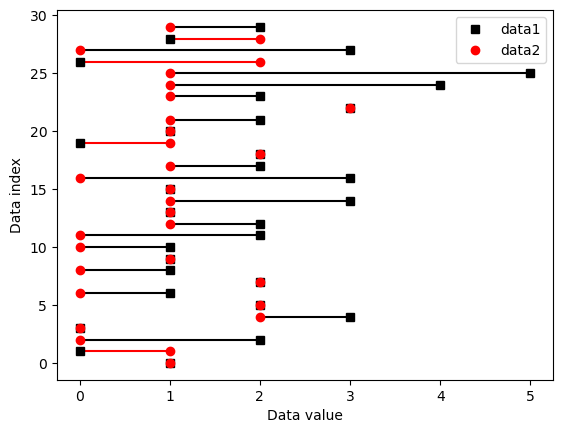

In [6]:
## generate the data

N = 30

data1 = np.random.poisson(1.5,N)
data2 = np.random.poisson(1,N)

colors = 'kr'
for i in range(N):
    plt.plot([data1[i], data2[i]],[i, i],colors[int(data1[i]<data2[i])])

plt.plot(data1,np.arange(N),'ks',markerfacecolor='k',label='data1')
plt.plot(data2,np.arange(N),'ro',markerfacecolor='r',label='data2')

plt.ylabel('Data index')
plt.xlabel('Data value')
plt.legend()

plt.show()

In [7]:
## now for the test

t,p = stats.wilcoxon(data1,data2)
print('Wilcoxon z=%g, p=%g'%(t,p))


Wilcoxon z=34, p=0.00647458


/Users/antonis/miniforge3/envs/dfl_test/lib/python3.8/site-packages/scipy/stats/_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


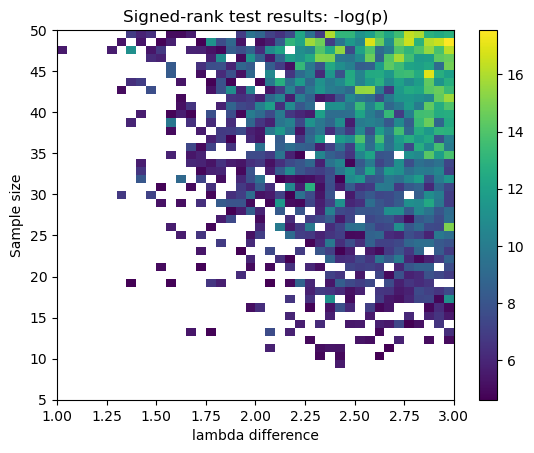

In [8]:
## now for the 2D space

# parameter ranges
Ns = np.arange(5,51)
lambdas = np.linspace(1,3,40)

# initialize output matrix
pvals = np.zeros((len(Ns),len(lambdas)))

for ni in range(len(Ns)):
    for li in range(len(lambdas)):
        
        # generate some data
        data1 = np.random.poisson(lambdas[0], Ns[ni])
        data2 = np.random.poisson(lambdas[li],Ns[ni])
        
        # compute the statistic
        t,p = stats.wilcoxon(data1,data2)
        
        # store the results
        pvals[ni,li] = -np.log(p)
        

# optional p-value thresholding
pvalthresh = .01
pvals[ pvals<-np.log(pvalthresh) ] = np.NaN


# now show in a heatmap!
plt.imshow(pvals,origin='lower',extent=[lambdas[0],lambdas[-1],Ns[0],Ns[-1]],aspect='auto')
plt.xlabel('lambda difference')
plt.ylabel('Sample size')
plt.title('Signed-rank test results: -log(p)')
plt.colorbar()
plt.show()